## 特征提取

### 时域特征

#### 音频能量

In [1]:
import librosa
# 加载音频文件
audio_path = 'data/lijunjie/1.wav'
x, sr = librosa.load(audio_path)
# 计算音频信号的能量
energy = sum(x**2) / len(x)
print(f"音频能量：{energy}")

音频能量：4.2505971936445663e-07


#### 平均功率谱

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile

# 设置文件夹路径
data_folder = 'data/place'  # 你的数据文件夹路径

# 初始化空列表来存储特征和标签
features = []
labels = []

# 遍历每个文件夹
for folder in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith('.wav'):
                file_path = os.path.join(folder_path, filename)
                # 读取音频文件
                sampling_rate, audio_data = wavfile.read(file_path)
                # 计算FFT
                Y = np.fft.fft(audio_data)
                # 计算功率谱
                power_spectrum = np.abs(Y) ** 2 / len(Y)
                average_power_spectrum = np.mean(power_spectrum)
                # 添加到特征列表
                features.append(average_power_spectrum)
                # 添加对应的标签
                labels.append(folder)

# 创建DataFrame并保存到CSV文件
df = pd.DataFrame(features)
df['label'] = labels
df.to_csv('average_power_spectrum_place.csv', index=False)

print("功率谱特征已保存到 average_power_spectrum_place.csv 文件。")

### 频域特征

#### 功率谱

In [ ]:
import librosa
import numpy as np

# 读取WAV文件
audio_data, sample_rate = librosa.load('std.wav', sr=None)
from scipy.fftpack import fft

# 计算FFT
Y = fft(audio_data)
power_spectrum = np.abs(Y) ** 2 / len(Y)
print(power_spectrum)
import matplotlib.pyplot as plt

plt.plot(power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.show()

#### 梅尔倒谱系数——MFCC 形状矩阵

In [3]:
import librosa
# 加载音频文件
audio_path = 'data/lijunjie/1.wav'
x, sr = librosa.load(audio_path)
# 提取MFCC特征
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)  # 选择13个MFCC系数
print(f"MFCC特征的形状：{mfccs.shape}")

MFCC特征的形状：(13, 302)


#### 梅尔倒谱系数——MFCCs 矩阵数值

##### 维度太高，慎用

In [2]:
import numpy as np
import scipy.io.wavfile as wav
import librosa.feature

# 读取音频文件
rate, wavsignal = wav.read('std.wav')

# 将整数类型的音频数据转换为浮点数类型
wavsignal = wavsignal.astype(np.float32) / np.iinfo(wavsignal.dtype).max

# 计算梅尔频谱
mel_spectrogram = librosa.feature.melspectrogram(y=wavsignal, sr=rate)

# 取对数
log_mel_spectrogram = np.log(mel_spectrogram + 1e-10)  # 避免出现log(0)

# 计算MFCCs
mfccs = librosa.feature.mfcc(S=log_mel_spectrogram, n_mfcc=13)

print(mfccs)

[[-1.8599826e+02 -1.8480855e+02 -1.8641290e+02 ... -1.7864145e+02
  -1.7931711e+02 -1.8313155e+02]
 [ 3.6962814e+01  4.0139664e+01  4.1778294e+01 ...  4.8364975e+01
   4.8629639e+01  4.5566101e+01]
 [ 1.2375579e+01  1.7398184e+01  2.1034292e+01 ...  1.9381474e+01
   2.1433729e+01  1.8019646e+01]
 ...
 [ 4.2699611e-01  6.4199167e-01  1.5956373e+00 ... -2.1161118e-01
   1.2220614e-01  6.9495851e-01]
 [-9.8194504e-01 -3.1306547e-01  1.1948091e-01 ...  8.7072915e-01
   1.0894375e+00  1.0682983e+00]
 [-3.8184845e-01  1.2508991e+00  1.6188000e+00 ...  2.5297866e+00
   3.4004059e+00  2.0130930e+00]]


### 时频域分析

#### 小波系数

In [4]:
import numpy as np
import librosa
import pywt
import matplotlib.pyplot as plt

In [5]:
# 读取音频文件
audio, sr = librosa.load('std.wav', sr=None)

In [6]:
# 定义小波基名称（例如，'db4'）
wavelet_name = 'db4'

# 使用指定小波基进行4级小波分解
coeffs = pywt.wavedec(audio, wavelet_name, level=4)

# 绘制原始信号图像
plt.figure(figsize=(8, 6))
plt.subplot(5, 1, 1)
plt.plot(audio)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 绘制小波系数图像
for i in range(1, len(coeffs)):
    plt.subplot(5, 1, i+1)
    plt.plot(coeffs[i])
    plt.title(f'Wavelet Coefficients - Level {i}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

#### 能量特征

In [8]:
import numpy as np
import pywt

# 假设你已经有一个名为'coeffs'的小波系数序列
# 计算每个系数序列的能量
energy_features = [np.sum(np.square(coeff)) for coeff in coeffs]

# 现在，energy_features就是你的特征向量
print("能量特征向量:", energy_features)

能量特征向量: [0.3696609, 0.0004383094, 1.0426533e-05, 6.39732e-06, 1.1952901e-05]


#### 频率特征

In [13]:
# 假设你有两个小波系数序列：high_coeffs和low_coeffs
high_coeffs = coeffs[1]
low_coeffs = coeffs[0]
# 计算高频部分与低频部分的比值
frequency_ratio = np.divide(high_coeffs, low_coeffs)

# 现在，frequency_ratio就是你的特征向量
print("频率特征向量:", frequency_ratio)

频率特征向量: [-0.00020363 -0.00325214 -0.04070048 ...  0.04114281  0.09025304
 -0.01811493]


#### 时频特征

##### 高频特征预览

[-1.4047241e-05 -4.4548466e-05  1.8487042e-05 ... -4.6965171e-05
  2.4626548e-05 -1.4014107e-05]


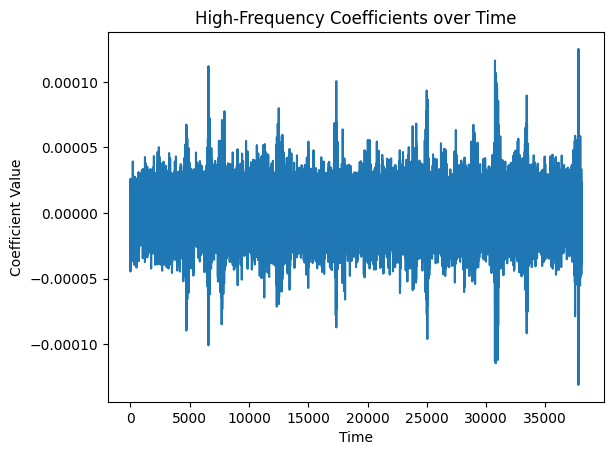

In [14]:
# 假设你有一个小波系数序列：coeffs
# 选择某个频率范围（例如高频部分）
selected_coeffs = coeffs[2]  # 假设这是高频部分的系数
# print(coeffs[2])

# 绘制该系数随时间的变化
import matplotlib.pyplot as plt
plt.plot(selected_coeffs)
plt.title("High-Frequency Coefficients over Time")
plt.xlabel("Time")
plt.ylabel("Coefficient Value")
plt.show()

##### 单音频操作：能量、均值、标准差

In [15]:
import os
import pandas as pd
import numpy as np
import pywt
from scipy.io import wavfile
audio_path = 'test/6.wav'
# 读取音频文件
rate, wavsignal = wavfile.read(audio_path)

# 进行小波变换
wavelet_name = 'db4'
coeffs = pywt.wavedec(wavsignal, wavelet_name, level=4)

# 获取高频部分的系数（假设这是第二个尺度的高频部分）
high_coeffs = coeffs[2]

# 提取时频特征（例如能量、均值等）
feature_vector = [np.sum(np.square(high_coeffs)), np.mean(high_coeffs), np.std(high_coeffs)]
print(feature_vector)

[11649.518351516865, 0.003975687329920455, 0.6500447161176752]


##### 批量操作并存放到CSV文件

In [5]:
import os
import pandas as pd
import numpy as np
import pywt
from scipy.io import wavfile

# 读取labels.csv文件
labels_df = pd.read_csv('240402_xzq_p2.csv', delimiter=' ', header=None, names=['label', 'path'])

# 初始化特征向量列表
feature_vectors = []

# 遍历每个音频文件
for index, row in labels_df.iterrows():
    label = row['label']
    audio_path = row['path']
    
    # 读取音频文件
    rate, wavsignal = wavfile.read(audio_path)
    
    # 进行小波变换
    wavelet_name = 'db4'
    coeffs = pywt.wavedec(wavsignal, wavelet_name, level=4)
    
    # 获取高频部分的系数（假设这是第二个尺度的高频部分）
    high_coeffs = coeffs[2]
    
    # 提取时频特征（例如能量、均值等）
    feature_vector = [np.sum(np.square(high_coeffs)), np.mean(high_coeffs), np.std(high_coeffs)]
    
    # 添加标签
    feature_vector.append(label)
    
    # 添加到特征向量列表
    feature_vectors.append(feature_vector)

# 创建DataFrame
feature_df = pd.DataFrame(feature_vectors, columns=['energy', 'mean', 'std', 'label'])

# 将特征向量写入CSV文件
feature_df.to_csv('xzq_p2_vectors.csv', index=False)
print("特征向量已写入xzq_p2_vectors.csv文件。")

特征向量已写入xzq_p2_vectors.csv文件。


#### 短时傅里叶变换——STFT

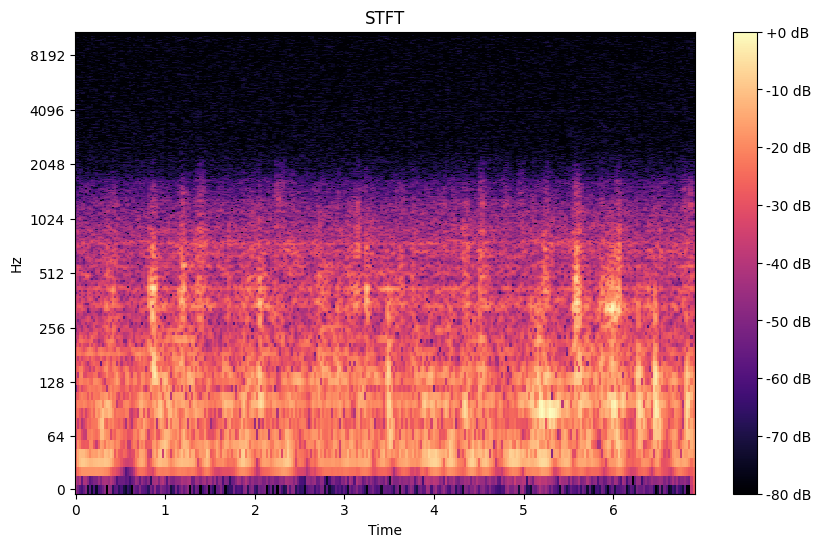

In [4]:
import numpy as np
import scipy.io.wavfile as wav
import librosa
import matplotlib.pyplot as plt
# 读取音频文件
audio_path = 'std.wav'
x, sr = librosa.load(audio_path)

# 计算STFT
D = librosa.stft(x)
# 取绝对值，保留幅度信息
D_abs = np.abs(D)
# 计算STFT的dB-scaled spectrogram
D_db = librosa.amplitude_to_db(D_abs, ref=np.max)

# 绘制STFT图像
plt.figure(figsize=(10, 6))
librosa.display.specshow(D_db, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()

In [6]:
import numpy as np
import scipy.io.wavfile as wav
import librosa

# 读取音频文件
audio_path = 'std.wav'
x, sr = librosa.load(audio_path)

# 计算STFT
D = librosa.stft(x)

# 切割成10段
num_segments = 10
segment_length = D.shape[1] // num_segments

# 初始化特征矩阵
feature_matrix = np.zeros((num_segments, 4))  # 4个统计特征：均值、方差、最大值、最小值

# 计算每个时间窗口的统计特征
for i in range(num_segments):
    segment = D[:, i * segment_length: (i + 1) * segment_length]
    feature_matrix[i, 0] = np.mean(segment.real)  # 只保留实部
    feature_matrix[i, 1] = np.var(segment.real)
    feature_matrix[i, 2] = np.max(segment.real)
    feature_matrix[i, 3] = np.min(segment.real)

print("特征矩阵：")
print(feature_matrix)

特征矩阵：
[[ 1.75524050e-07  2.24736446e-04  4.28200930e-01 -4.44614559e-01]
 [ 3.72180864e-08  6.01591659e-04  5.38668931e-01 -7.44223893e-01]
 [-9.61973470e-08  2.27002907e-04  3.51143807e-01 -4.27537441e-01]
 [ 1.27426020e-07  2.77321727e-04  5.40977478e-01 -5.59855103e-01]
 [-1.14877714e-07  2.60805711e-04  3.53915066e-01 -3.29001456e-01]
 [ 1.00587904e-07  3.47501395e-04  6.20146990e-01 -6.00101709e-01]
 [ 3.21613044e-07  3.21740139e-04  5.85936606e-01 -5.74424863e-01]
 [ 3.12466625e-07  9.33425617e-04  1.39623439e+00 -1.31948173e+00]
 [ 4.14993515e-08  1.05501479e-03  1.16510212e+00 -1.08696854e+00]
 [-8.59517755e-08  4.97169967e-04  6.62171483e-01 -6.79747522e-01]]


## 生成特征向量

In [8]:
import os
import pandas as pd
import librosa

wav_filepath = 'std.wav'

x, sr = librosa.load(wav_filepath)
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)  # 选择13个MFCC系数
energy = sum(x**2) / len(x)  # 计算能量
feature_vector = mfccs.flatten().tolist() + [energy]

# print(feature_vector)

In [6]:
import os
import pandas as pd
import librosa

# 文件夹路径
data_folder = 'data'
full_folder = os.path.join(data_folder, 'full')
labels_csv = os.path.join(full_folder, 'labels.csv')

# 创建空的DataFrame来存储特征向量和标签
df = pd.DataFrame(columns=['feature', 'label'])

# 遍历labels.csv中的每一行
with open(labels_csv, 'r') as f:
    for line in f:
        label, wav_filepath = line.strip().split(' ')
        x, sr = librosa.load(wav_filepath)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)  # 选择13个MFCC系数
        energy = sum(x**2) / len(x)  # 计算能量
        feature_vector = mfccs.flatten().tolist() + [energy]
        df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)

# 保存到CSV文件
output_csv = 'features_and_labels.csv'
df.to_csv(output_csv, index=False)

print(f"特征向量和标签已保存到 {output_csv} 中。")

C:\Users\86180\AppData\Local\Temp\ipykernel_119224\3249559179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\3249559179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\3249559179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\3249559179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pand

特征向量和标签已保存到 features_and_labels.csv 中。


In [10]:
import os
import pandas as pd
import librosa

# 文件夹路径
data_folder = 'data'
full_folder = os.path.join(data_folder, 'full')
labels_csv = os.path.join(full_folder, 'labels.csv')

# 创建空的DataFrame来存储特征向量和标签
df = pd.DataFrame(columns=['feature', 'label'])

# 遍历labels.csv中的每一行
with open(labels_csv, 'r') as f:
    for line in f:
        label, wav_filepath = line.strip().split(' ')
        x, sr = librosa.load(wav_filepath)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)  # 选择13个MFCC系数
        feature_vector = mfccs.flatten().tolist()
        df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)

# 保存到CSV文件
output_csv = 'mfcc.csv'
df.to_csv(output_csv, index=False)

print(f"特征向量和标签已保存到 {output_csv} 中。")

C:\Users\86180\AppData\Local\Temp\ipykernel_119224\2807822913.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\2807822913.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\2807822913.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\2807822913.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pand

特征向量和标签已保存到 mfcc.csv 中。


In [11]:
import os
import pandas as pd
import librosa

# 文件夹路径
data_folder = 'data'
full_folder = os.path.join(data_folder, 'full')
labels_csv = os.path.join(full_folder, 'labels.csv')

# 创建空的DataFrame来存储特征向量和标签
df = pd.DataFrame(columns=['feature', 'label'])

# 遍历labels.csv中的每一行
with open(labels_csv, 'r') as f:
    for line in f:
        label, wav_filepath = line.strip().split(' ')
        x, sr = librosa.load(wav_filepath)
        energy = sum(x**2) / len(x)  # 计算能量
        feature_vector = [energy]
        df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)

# 保存到CSV文件
output_csv = 'energy.csv'
df.to_csv(output_csv, index=False)

print(f"只包含能量特征的特征向量和标签已保存到 {output_csv} 中。")

C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pand

只包含能量特征的特征向量和标签已保存到 energy.csv 中。


C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pand